 * Copyright 2024 Xue_Lexiang
 * Licensed under MIT (https://github.com/xuelx1/LearnQC/LISENCE)

## Grover's Algorithm. 4 qubits case.

### 1.Initialize and Get Data

In [45]:
from funcs import *
from qiskit.circuit.library import MCXGate
from qiskit import ClassicalRegister
import math

In [46]:
target = '0101'
n = 4
N = 2**n

### 2.Map the circuit

#### grover iteration: $$ G = -H^n Z_0 H^n Z_f$$

In [47]:
# map grover iteration: $$ -H^n Z_0 H^n Z_f
gate = MCXGate(n)
def grover_iteration(qc, target):
    qc.x(range(n))
    qc.h(range(n))
    qc.append(gate, range(n+1))

    return qc
    

iteration number: 4


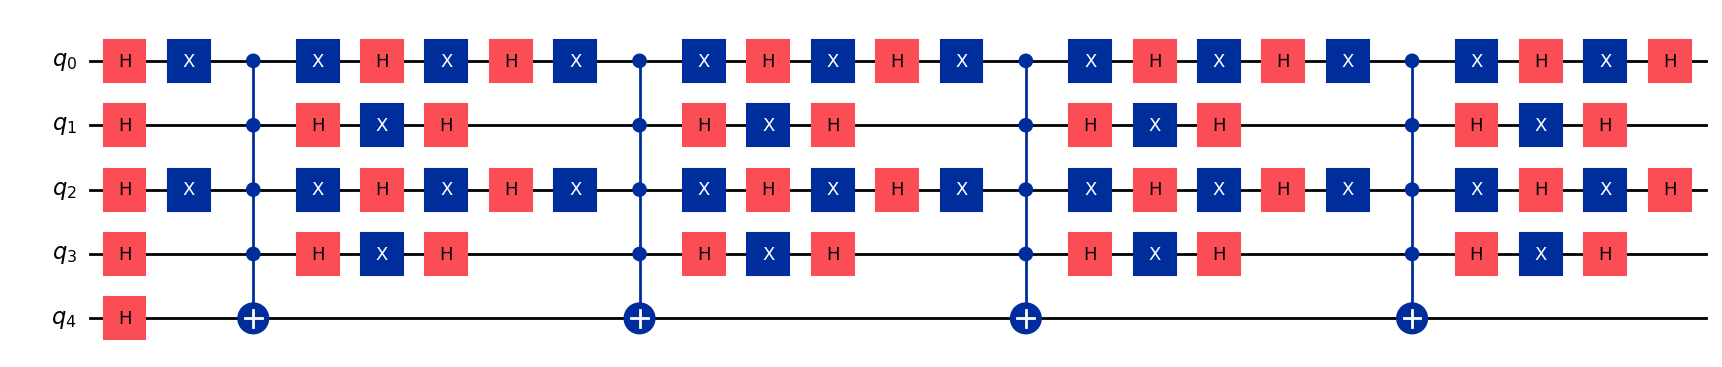

In [48]:
qc = QuantumCircuit(n+1)
qc.h(range(n+1))
iter_num = math.ceil(math.pi/4*math.sqrt(N))
print("iteration number:", iter_num)
for i in range(iter_num):
    qc = grover_iteration(qc, target=target)
qc.draw(output='mpl')

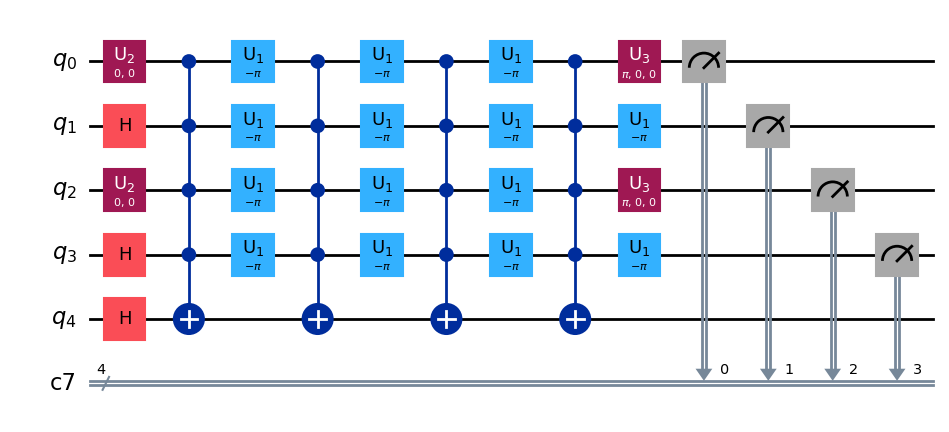

In [49]:
qc = transpile(qc, backend=AerSimulator(), optimization_level=2)
c = ClassicalRegister(n)
qc.add_register(c)
for i in range(n):
    qc.measure(i, c[i])
qc.draw(output='mpl')

In [50]:
results = execute_qc(qc)
print('target = ', target)
print('results = ', results)

target =  0101
results =  {'0100': 58, '1101': 85, '0010': 63, '1001': 67, '0001': 73, '1111': 57, '0000': 75, '0111': 50, '0101': 53, '0011': 62, '1010': 64, '1100': 55, '1110': 64, '1000': 68, '0110': 61, '1011': 69}
